In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
# Load dataset (update path if needed)
df = pd.read_csv("/content/tested.csv")



In [49]:
# Quick look
print(df.head(5))


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [50]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [51]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [52]:
# Missing values
print(df.isnull().sum())




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [53]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df = df.drop(columns=['Cabin'])
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


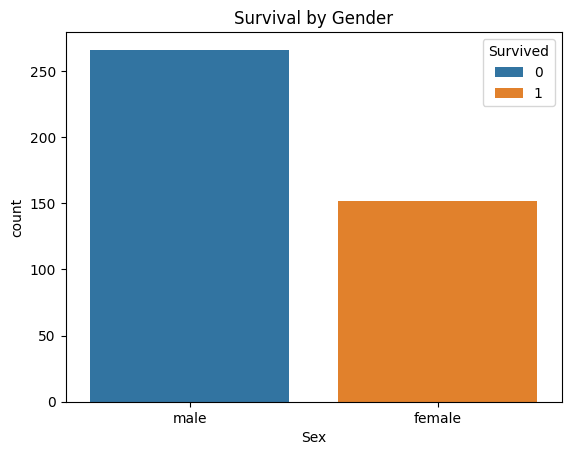

In [54]:
# 1. Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

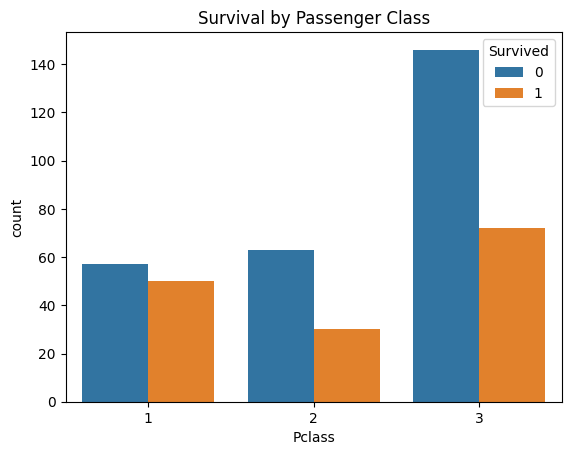

In [55]:
# 2. Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

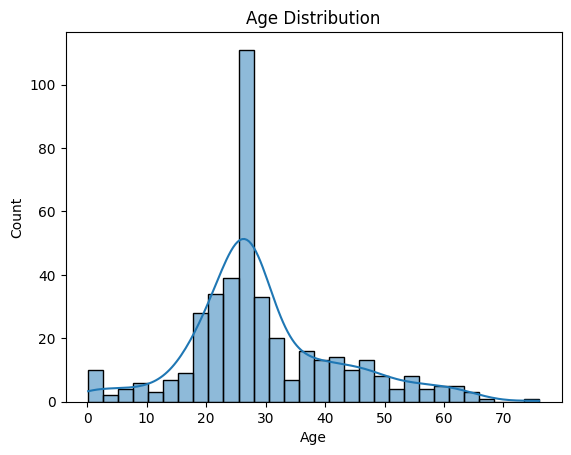

In [56]:
# 3. Age Distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

/tmp/ipython-input-2897395456.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived']==1, "Age"], label="Survived", shade=True)
/tmp/ipython-input-2897395456.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived']==0, "Age"], label="Not Survived", shade=True)


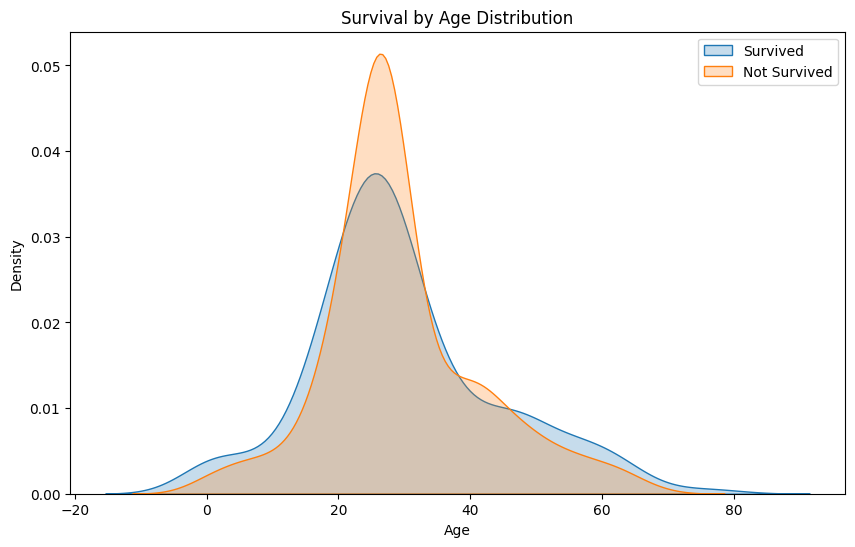

In [57]:
# 4. Survival by Age
plt.figure(figsize=(10,6))
sns.kdeplot(df.loc[df['Survived']==1, "Age"], label="Survived", shade=True)
sns.kdeplot(df.loc[df['Survived']==0, "Age"], label="Not Survived", shade=True)
plt.title("Survival by Age Distribution")
plt.legend()
plt.show()

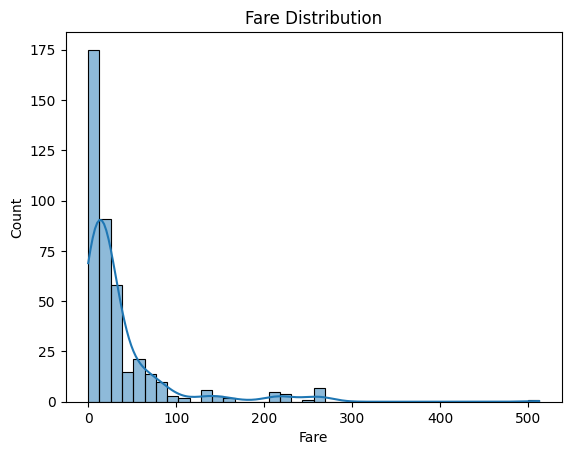

In [58]:
# 5. Fare Distribution
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title("Fare Distribution")
plt.show()

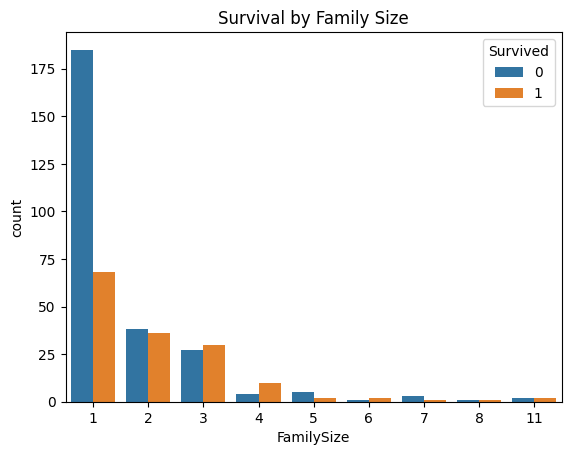

In [59]:
# 6. Family Size Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(x="FamilySize", hue="Survived", data=df)
plt.title("Survival by Family Size")
plt.show()

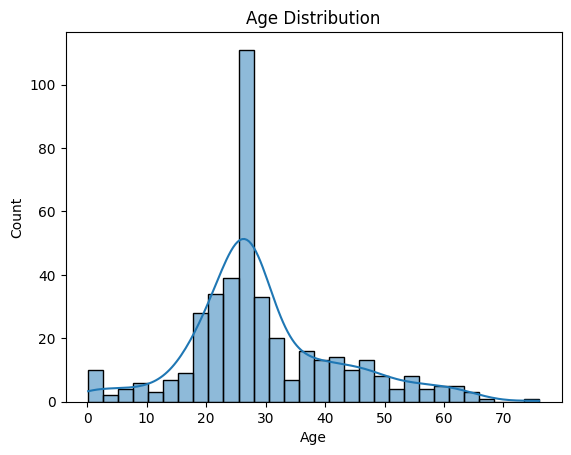

In [60]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


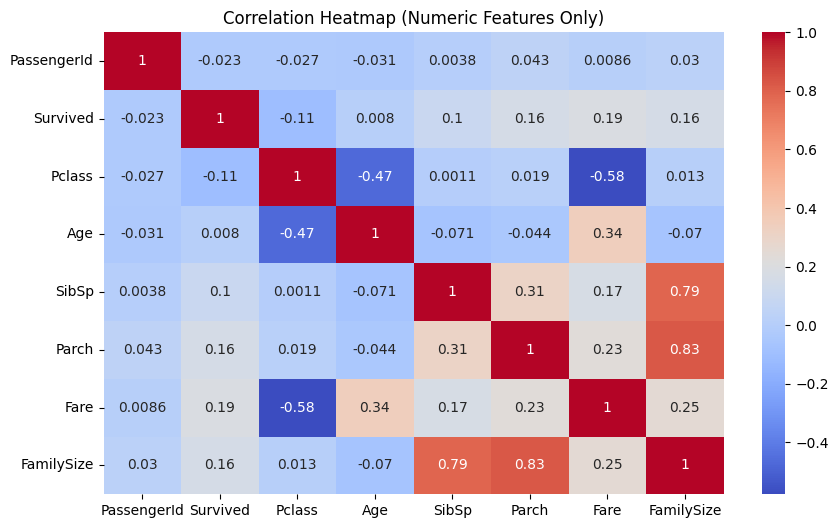

In [61]:
# 7. Correlation Heatmap (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [62]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid messing original df
df_encoded = df.copy()

# Encode Sex
df_encoded['Sex'] = LabelEncoder().fit_transform(df_encoded['Sex'])

# Encode Embarked
df_encoded['Embarked'] = LabelEncoder().fit_transform(df_encoded['Embarked'])


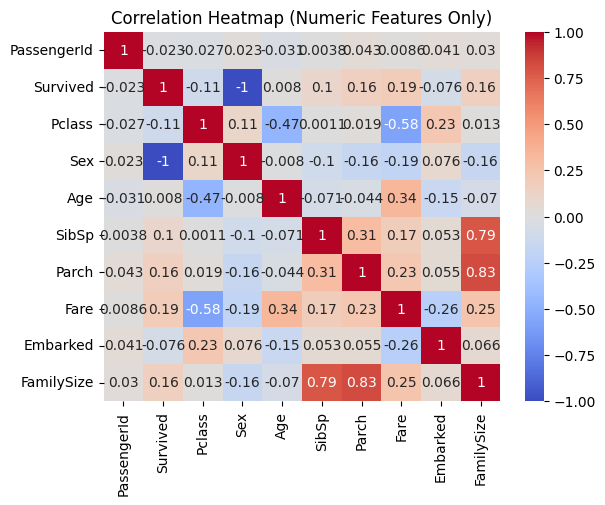

In [37]:
numeric_df = df_encoded.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()
